In [1]:
from utils import *

In [2]:
velocities = {
    -1.9: [586913],
    -1.5: [586914],
    -1.1: [586915],
    -0.9: [586916],
    -0.5: [586917],
    -0.1: [586918],
    0.1:  [586919],
    0.5:  [586920],
    0.9:  [586921],
    1.1:  [586922],
    1.5:  [586923],
    1.9:  [586924],
}

In [3]:
remotepaths ={vel: {job: f"/tiger/u/lando/cmeta/v{vel}/{job}/log.json" for job in jobs} for (vel, jobs) in velocities.items()}
localpaths ={vel: {job: f"/tmp/log{job}.json" for job in jobs} for (vel, jobs) in velocities.items()}

In [4]:
# buffer
reload = True

In [5]:
import os
if reload:
    for vel in velocities:
        for job in velocities[vel]:
            remote = remotepaths[vel][job]
            local = localpaths[vel][job]
            command = f"scp lando@sc.stanford.edu:{remote} {local}"
            rcode = os.system(command)
            if rcode != 0:
                print(command)
                raise Exception(f"Bad Status code vel={vel}, job={job}")
            print(f"Velocity = {vel}, Loaded Job {job}")

Velocity = -1.9, Loaded Job 586913
Velocity = -1.5, Loaded Job 586914
Velocity = -1.1, Loaded Job 586915
Velocity = -0.9, Loaded Job 586916
Velocity = -0.5, Loaded Job 586917
Velocity = -0.1, Loaded Job 586918
Velocity = 0.1, Loaded Job 586919
Velocity = 0.5, Loaded Job 586920
Velocity = 0.9, Loaded Job 586921
Velocity = 1.1, Loaded Job 586922
Velocity = 1.5, Loaded Job 586923
Velocity = 1.9, Loaded Job 586924


In [6]:
lines = {vel: {job: read_log(localpaths[vel][job]) for job in jobs} for (vel, jobs) in velocities.items()}

In [7]:
warms = {vel: {} for vel in velocities}
slbos = {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        warm, slbo = extract_rewards(lines[vel][job])
        warms[vel][job] = warm
        slbos[vel][job] = slbo
        if len(slbos[vel][job]) == 0:
            print(f"Velocity {vel}, Job {job} has started 0 stages")
        else:
            print(f"Velocity {vel}, Job {job} has started {len(slbos[vel][job][0])} stages")

Velocity -1.9, Job 586913 has started 0 stages
Velocity -1.5, Job 586914 has started 0 stages
Velocity -1.1, Job 586915 has started 0 stages
Velocity -0.9, Job 586916 has started 0 stages
Velocity -0.5, Job 586917 has started 0 stages
Velocity -0.1, Job 586918 has started 0 stages
Velocity 0.1, Job 586919 has started 0 stages
Velocity 0.5, Job 586920 has started 0 stages
Velocity 0.9, Job 586921 has started 0 stages
Velocity 1.1, Job 586922 has started 0 stages
Velocity 1.5, Job 586923 has started 0 stages
Velocity 1.9, Job 586924 has started 0 stages


In [8]:
real_warms = {vel: {} for vel in velocities}
virt_warms = {vel: {} for vel in velocities}
shad_warms = {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        rw, vr, sr = get_warmups(lines[vel][job], n_shadow=10)
        real_warms[vel][job] = rw
        virt_warms[vel][job] = vr
        shad_warms[vel][job] = sr
        print(f"Velocity {vel} Job {job} has {len(real_warms[vel][job][0])} warmup iters")

Velocity -1.9 Job 586913 has 79 warmup iters
Velocity -1.5 Job 586914 has 79 warmup iters
Velocity -1.1 Job 586915 has 79 warmup iters
Velocity -0.9 Job 586916 has 79 warmup iters
Velocity -0.5 Job 586917 has 79 warmup iters
Velocity -0.1 Job 586918 has 79 warmup iters
Velocity 0.1 Job 586919 has 79 warmup iters
Velocity 0.5 Job 586920 has 79 warmup iters
Velocity 0.9 Job 586921 has 79 warmup iters
Velocity 1.1 Job 586922 has 79 warmup iters
Velocity 1.5 Job 586923 has 79 warmup iters
Velocity 1.9 Job 586924 has 79 warmup iters


In [9]:
real_rewards = {vel: {} for vel in velocities}
virt_rewards = {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        real, virt = get_checkpoints(lines[vel][job])
        real_rewards[vel][job] = real
        virt_rewards[vel][job] = virt

In [10]:
mins = {
    0.1: -233.78927811594411, 
    0.5: -411.35567527732564, 
    0.9: -610.8872788980733, 
    1.1: -710.8872788980734, 
    1.5: -910.8872788980736, 
    1.9: -1110.8872788980734,
}
maxs = {
    0.1: -3.5636334132798204, 
    0.5: -10.710668525449655, 
    0.9: -30.98072317031702, 
    1.1: -44.14465103596886, 
    1.5: -51.02850590038164, 
    1.9: -61.263854017466976
}

avgs = {
     0.1: -10.202044447173503, 
    0.5: -21.142860320736776, 
    0.9: -46.16668517147687, 
    1.1: -66.24972224328671, 
    1.5: -87.42144407053759, 
    1.9: -113.32796903390458, 
    2.0: -137.50432902203622,
}


#### AVERAGED 

maxs = {-2.0: -90.60565689208266, -1.9: -70.67690735370886, -1.5: -42.06956291427862, -1.1: -36.99489419364075, -1.0: -23.743657058369845, -0.9: -21.157800214277188, -0.1: -3.1041742201174394, -0.5: -10.680755730823584, 0.1: -3.4021209446496337, 0.5: -12.323942266246538, 0.9: -23.53198112703673, 1.1: -31.343789461165542, 1.5: -51.21932985927324, 1.9: -63.050301977318384, 2.0: -85.4236675900036}
mins = {-2.0: -993.9190119522864, -1.9: -945.0818382085795, -1.5: -745.0818382085795, -1.1: -546.2446644648728, -1.0: -510.61478664909976, -0.9: -445.43216946165614, -0.1: -187.5039532110764, -0.5: -259.65397607613966, 0.1: -231.2243621688237, 0.5: -410.1003669467948, 0.9: -609.6475634930734, 1.1: -709.6475634930736, 1.5: -909.6475634930736, 1.9: -1109.6475634930734, 2.0: -1160.8872788980732}
avgs = {-2.0: -136.4502250988098, -1.9: -101.15423269038038, -1.5: -73.20949096123613, -1.1: -61.13370977385761, -1.0: -47.087996715423955, -0.9: -35.88038558730979, -0.1: -8.75671650336899, -0.5: -18.677280704086265, 0.1: -9.545282672321349, 0.5: -23.09364493886916, 0.9: -40.610557419984794, 1.1: -50.763872744894364, 1.5: -81.94783046596359, 1.9: -105.55608759237818, 2.0: -137.50432902203622}


In [11]:
def plot_all_vel_warmups(vel):
    for job in velocities[vel]:
        fig, ax = plt.subplots(figsize=(15, 5))

        plot_stage(ax, warms[vel][job][0], 80, 40)
        warm_iters = len(real_warms[vel][job][0])
        ax.scatter([(i+1)*40 for i in range(0, warm_iters)], real_warms[vel][job][0], color="r")
        ax.scatter([(i+1)*40 for i in range(0, warm_iters)], virt_warms[vel][job][0], color="y")
        ax.errorbar([(i+1)*40 for i in range(0, warm_iters)], np.mean(shad_warms[vel][job][0], axis=0), color="m")
        ax.errorbar(
            [(i+1)*40 for i in range(0, warm_iters)], 
            np.mean(shad_warms[vel][job][0], axis=0), 
            np.std(shad_warms[vel][job][0], axis=0) / np.sqrt(10),
            color="m",
            fmt='o',
        )

        ax.set_title(f"v{vel} Warmup 80 Iters of SLBO")
        ax.axhline(y=mins[vel], color="yellow", label="min")
        ax.axhline(y=maxs[vel], color="orange", label="max")
        ax.axhline(y=avgs[vel], color="green", label="avg")
        ax.set_ylim((-500, 0))
        ax.legend()

In [12]:
seeds = [100, 101, 102]
def task_from_lines(lines):
    for line in lines:
        if "Task Fixed" not in line["fmt"]:
            continue
            
        return line["args"][0]["goal_velocity"]

for vel in velocities:
    for job in velocities[vel]:
        #print(f"{task_from_lines(lines[vel][job])} == {vel}")
        assert task_from_lines(lines[vel][job]) == vel

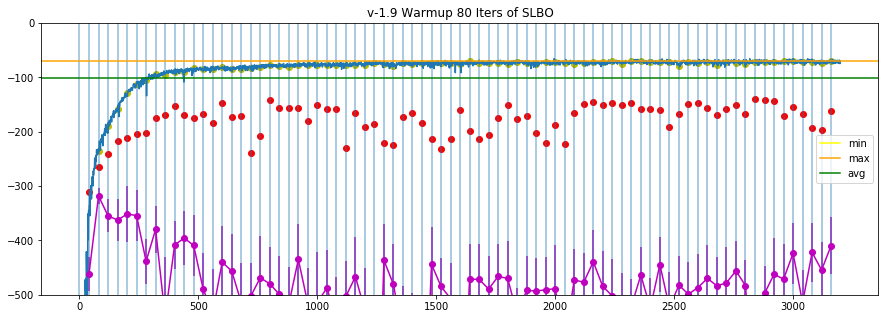

In [13]:
plot_all_vel_warmups(-1.9)

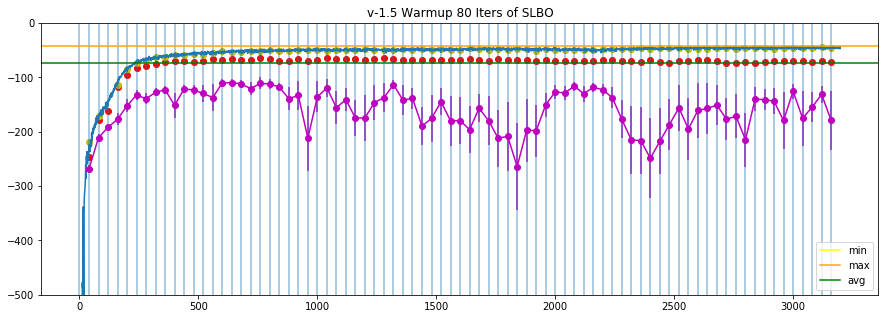

In [14]:
plot_all_vel_warmups(-1.5)

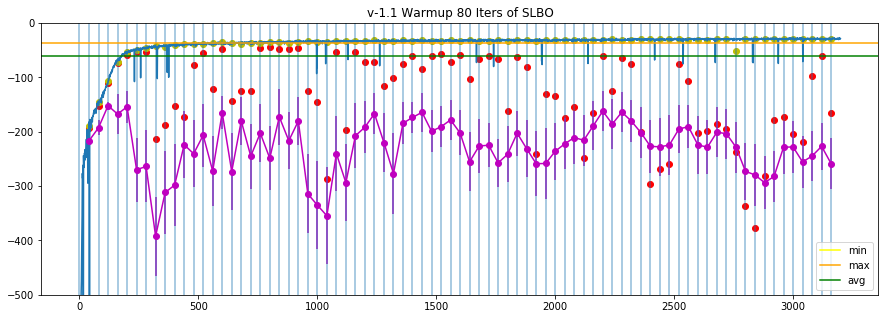

In [15]:
plot_all_vel_warmups(-1.1)

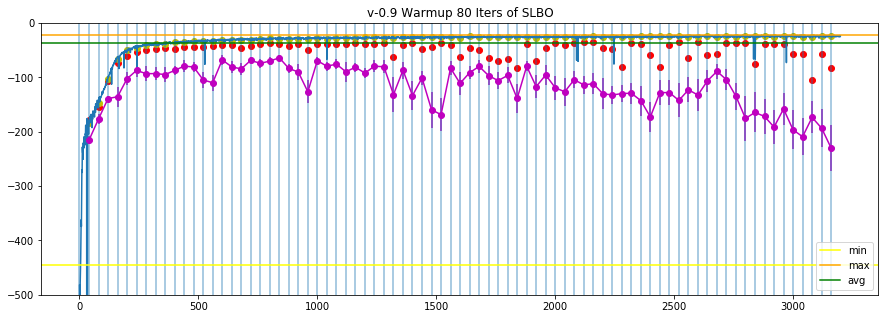

In [16]:
plot_all_vel_warmups(-0.9)

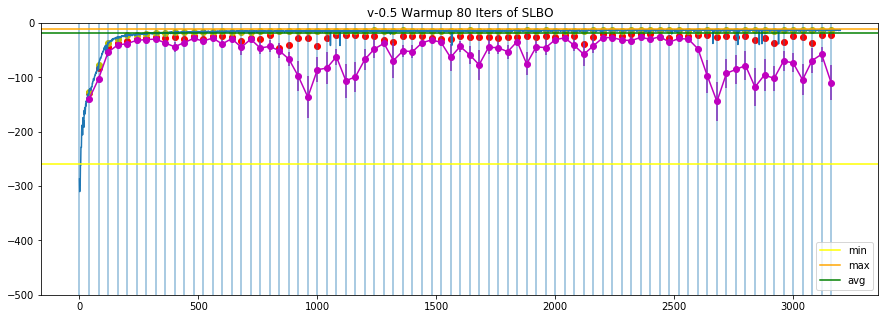

In [17]:
plot_all_vel_warmups(-0.5)

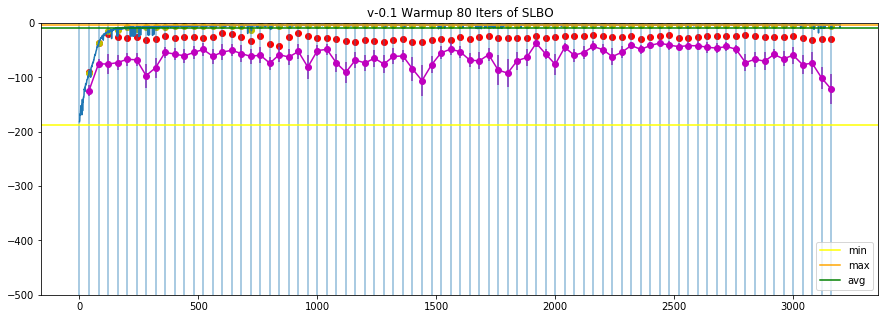

In [18]:
plot_all_vel_warmups(-0.1)

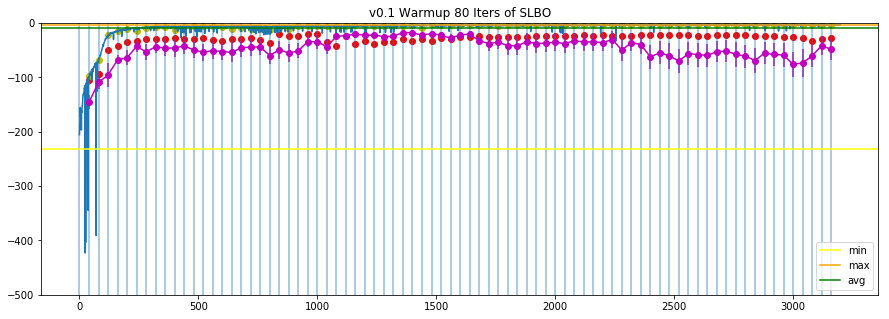

In [19]:
plot_all_vel_warmups(0.1)

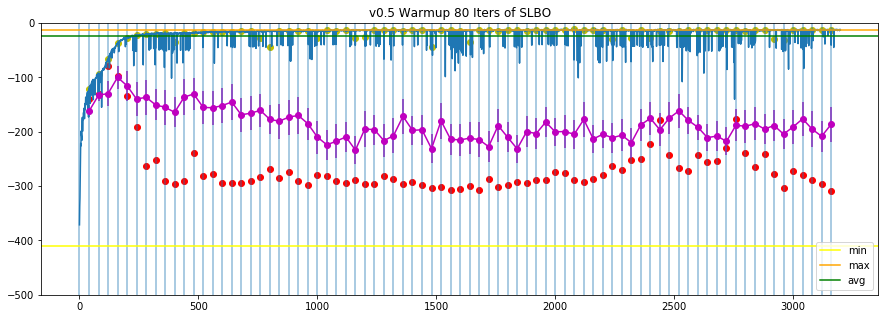

In [20]:
plot_all_vel_warmups(0.5)

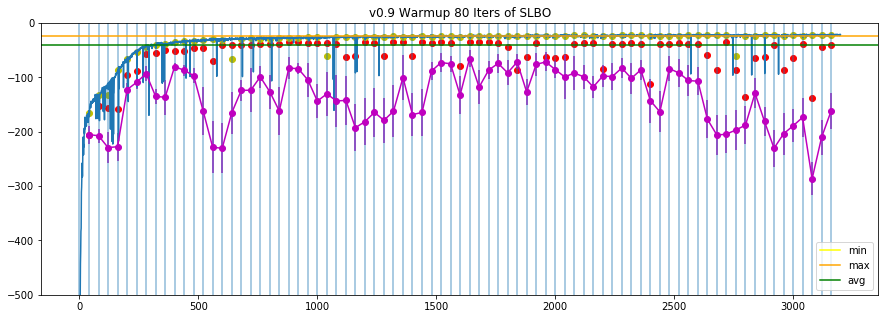

In [21]:
plot_all_vel_warmups(0.9)

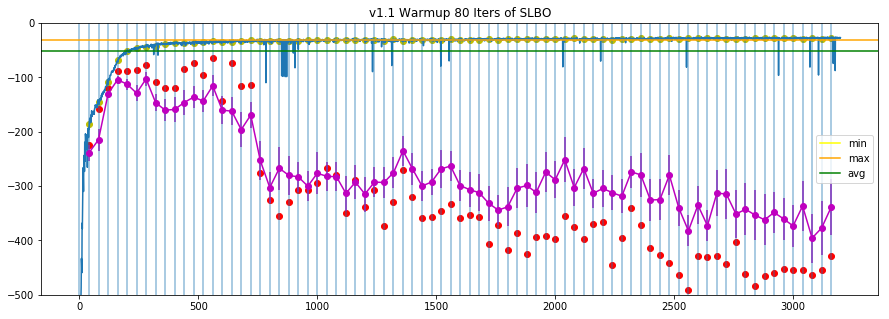

In [22]:
plot_all_vel_warmups(1.1)

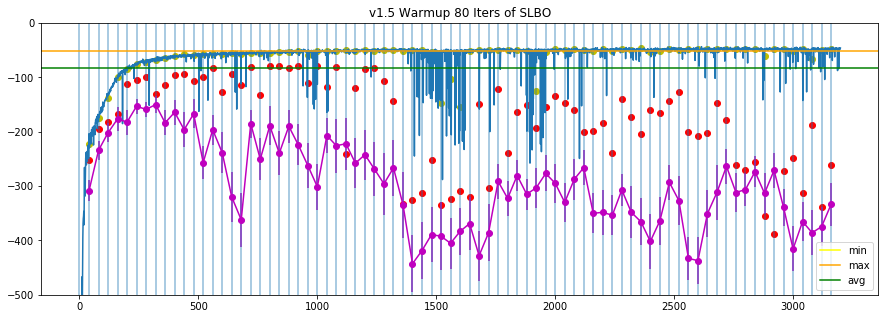

In [23]:
plot_all_vel_warmups(1.5)

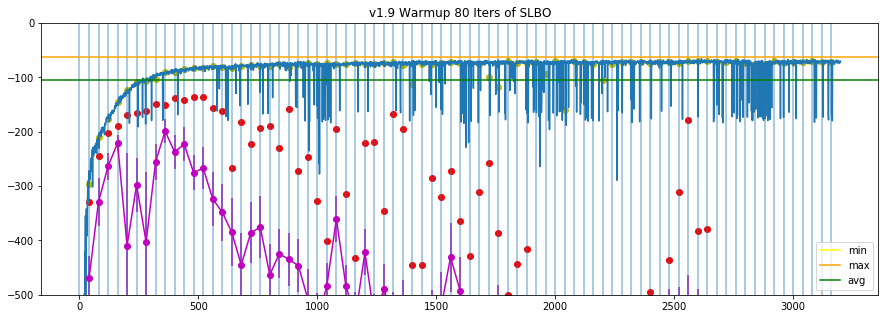

In [24]:
plot_all_vel_warmups(1.9)

In [25]:
def plot_virt_vs_shadow(vel):
    for job in velocities[vel]:
        fig, ax = plt.subplots(figsize=(15, 5))
        warm_iters = len(real_warms[vel][job])
        
        ax.scatter([(i+1)*40 for i in range(0, warm_iters)], real_warms[vel][job], color="r")
        ax.scatter([(i+1)*40 for i in range(0, warm_iters)], virt_warms[vel][job], color="y")
        ax.scatter([(i+1)*40 for i in range(0, warm_iters)], shad_warms[vel][job], color="m")

        ax.axhline(y=mins[vel], color="yellow", label="min")
        ax.axhline(y=maxs[vel], color="orange", label="max")
        ax.axhline(y=avgs[vel], color="green", label="avg")
        ax.set_ylim((-300, 0))
        ax.set_title(f"Vel {vel} Job {job}")
        ax.legend()

ValueError: x and y must be the same size

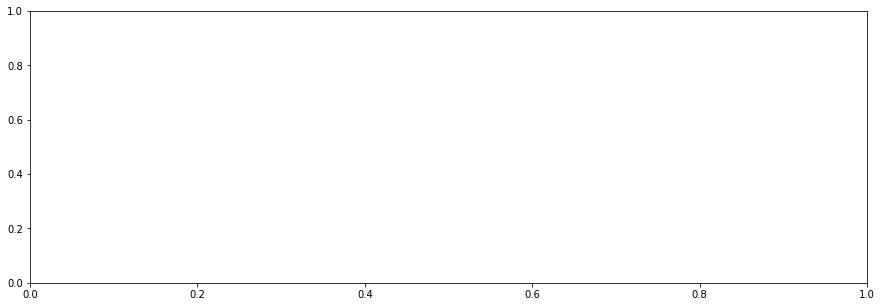

In [26]:
plot_virt_vs_shadow(-1.9)

In [ ]:
plot_virt_vs_shadow(-1.5)

In [ ]:
plot_virt_vs_shadow(-1.1)

In [ ]:
plot_virt_vs_shadow(-0.9)

In [ ]:
plot_virt_vs_shadow(-0.5)

In [ ]:
plot_virt_vs_shadow(-0.1)

In [ ]:
plot_virt_vs_shadow(0.1)

In [ ]:
plot_virt_vs_shadow(0.5)

In [ ]:
plot_virt_vs_shadow(0.9)

In [ ]:
plot_virt_vs_shadow(1.1)

In [ ]:
plot_virt_vs_shadow(1.5)

In [ ]:
plot_virt_vs_shadow(1.9)

In [ ]:
diff_warms = {vel: {} for vel in velocities}
for vel in velocities:
    for job in velocities[vel]:
        diff_warms[vel][job] = np.asarray(virt_warms[vel][job]) - np.asarray(shad_warms[vel][job])

In [ ]:
def plot_virt_vs_shadow_avg(vel):
    fig, ax = plt.subplots(2, 1, figsize=(15, 11))
    
    warm_iters = min([len(real_warms[vel][job]) for job in velocities[vel]])
    
    njobs = len(velocities[vel])
     
        
    ax[0].errorbar(
        [(i+1)*40 for i in range(0, warm_iters)], 
        np.mean(np.vstack([real_warms[vel][job] for job in velocities[vel]]), axis=0), 
        np.std(np.vstack([real_warms[vel][job] for job in velocities[vel]])) / np.sqrt(njobs),
        color="r",
        fmt='o',
    )
    ax[0].errorbar(
        [(i+1)*40 for i in range(0, warm_iters)], 
        np.mean(np.vstack([virt_warms[vel][job] for job in velocities[vel]]), axis=0),
        np.std(np.vstack([virt_warms[vel][job] for job in velocities[vel]])) / np.sqrt(njobs),
        color="y",
        fmt="o",
    )
    ax[0].errorbar(
        [(i+1)*40 for i in range(0, warm_iters)], 
        np.mean(np.vstack([shad_warms[vel][job] for job in velocities[vel]]), axis=0), 
        np.std(np.vstack([shad_warms[vel][job] for job in velocities[vel]])) / np.sqrt(njobs),
        color="m",
        fmt='o',
    )
    ax[0].set_title(f"v{vel} Warmup 80 Iters of SLBO")
    ax[0].axhline(y=mins[vel], color="yellow", label="min")
    ax[0].axhline(y=maxs[vel], color="orange", label="max")
    ax[0].axhline(y=avgs[vel], color="green", label="avg")
    ax[0].set_ylim((-300, 0))
    ax[0].legend()
    
    ax[1].errorbar(
        [(i+1)*40 for i in range(0, warm_iters)], 
        np.mean(np.vstack([diff_warms[vel][job] for job in velocities[vel]]), axis=0), 
        np.std(np.vstack([diff_warms[vel][job] for job in velocities[vel]])) / np.sqrt(njobs),
        color="m",
        fmt='o',
    )
    ax[1].set_ylim(-200, 600)

In [ ]:
plot_virt_vs_shadow_avg(-1.9)

In [ ]:
plot_virt_vs_shadow_avg(-1.5)

In [ ]:
plot_virt_vs_shadow_avg(-1.1)

In [ ]:
plot_virt_vs_shadow_avg(-0.9)

In [ ]:
plot_virt_vs_shadow_avg(-0.5)

In [ ]:
plot_virt_vs_shadow_avg(-0.1)

In [ ]:
plot_virt_vs_shadow_avg(0.1)

In [ ]:
plot_virt_vs_shadow_avg(0.5)

In [ ]:
plot_virt_vs_shadow_avg(0.9)

In [ ]:
plot_virt_vs_shadow_avg(1.1)

In [ ]:
plot_virt_vs_shadow_avg(1.5)

In [ ]:
plot_virt_vs_shadow_avg(1.9)

In [ ]:
TEMPdiffs = []
for vel in velocities:
    TEMPdiffs.append(np.median(np.median(np.vstack([diff_warms[vel][job] for job in velocities[vel]]), axis=0)[-10]))
TEMPdiffs
plt.scatter([vel for vel in velocities], TEMPdiffs)

In [ ]:
for vel in velocities:
    fig, ax = plt.subplots(figsize=(15, 5))
    
    plot_stage(ax, np.mean(np.vstack([warms[vel][job][0] for job in velocities[vel]]), axis=0), 80, 40, iterlines=False)
    warm_iters = min([len(real_warms[vel][job]) for job in velocities[vel]])
    
    njobs = len(velocities[vel])
                          
    ax.errorbar(
        [(i+1)*40 for i in range(0, warm_iters)], 
        np.mean(np.vstack([real_warms[vel][job] for job in velocities[vel]]), axis=0), 
        np.std(np.vstack([real_warms[vel][job] for job in velocities[vel]])) / np.sqrt(njobs),
        color="r",
        fmt='o',
    )
    ax.errorbar(
        [(i+1)*40 for i in range(0, warm_iters)], 
        np.mean(np.vstack([virt_warms[vel][job] for job in velocities[vel]]), axis=0),
        np.std(np.vstack([virt_warms[vel][job] for job in velocities[vel]])) / np.sqrt(njobs),
        color="y",
    )
    ax.set_title(f"v{vel} Warmup 80 Iters of SLBO")
    ax.axhline(y=mins[vel], color="yellow", label="min")
    ax.axhline(y=maxs[vel], color="orange", label="max")
    ax.axhline(y=avgs[vel], color="green", label="avg")
    ax.set_ylim((-300, 0))
    ax.legend()

In [ ]:
plot_virt_vs_shadow_avg(0.9)

In [ ]:
final_diffs = {vel: {} for vel in velocities}
avg_virt_diffs = {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        final_diffs[vel][job] = virt_warms[vel][job][-1] - real_warms[vel][job][-1]
        avg_virt_diffs[vel][job] = np.mean([
            virt_warms[vel][job][i] - virt_warms[vel][job][i-1] 
            for i in range(len(virt_warms[vel][job]) -1)
        ])

In [ ]:
plt.errorbar(
    [vel for vel in velocities],
    [np.mean([final_diffs[vel][job] for job in velocities[vel]]) for vel in velocities],
    [np.std([final_diffs[vel][job] for job in velocities[vel]]) / len(final_diffs[vel]) for vel in velocities],
)
plt.title("Avg Ending Virt - Real Gap")
plt.xlabel("velocity")
plt.ylabel("gap")

In [ ]:
plt.errorbar(
    [vel for vel in velocities],
    [np.mean([avg_virt_diffs[vel][job] for job in velocities[vel]]) for vel in velocities],
    [np.std([avg_virt_diffs[vel][job] for job in velocities[vel]]) / len(avg_virt_diffs[vel]) for vel in velocities],
)
plt.title("Avg Avg Virt Gap")
plt.xlabel("velocity")
plt.ylabel("gap")

In [ ]:
for vel in velocities:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for job in virt_warms[vel]:
        ax[0].plot(virt_warms[vel][job])
    ax[0].set_title(f"virt warms {vel}")
    ax[0].set_ylim(-300, 0)
    
    for job in virt_warms[vel]:
        diffs15 = [virt_warms[vel][job][i] - virt_warms[vel][job][i-1] 
                   for i in range(len(virt_warms[vel][job]) -1)]
        ax[1].plot(diffs15)
    ax[1].set_ylim(-100, 100)
    ax[1].set_title(f"diffs {vel}")
    plt.show()

In [ ]:
slbos[-1.9][539481][0]
plot_stages(slbos[-1.9][539481][0], 40, 40, ylim=(-300, 0))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(real_rewards[-1.9][565638])
ax.axhline(y=mins[-1.9], color="yellow", label="min")
ax.axhline(y=maxs[-1.9], color="orange", label="max")
ax.axhline(y=avgs[-1.9], color="green", label="avg")

In [ ]:
for vel in real_rewards:
    fig, ax = plt.subplots()
    ax.scatter([i for i in range(len(real_rewards[vel]))], real_rewards[vel], label=f"vel={vel}")
    ax.axhline(y=mins[vel], color="yellow")
    ax.axhline(y=maxs[vel], color="orange")
    ax.set_ylim((-200, 0))
    ax.axhline(y=avgs[vel], color="green")
    ax.legend()

In [ ]:
for i in range(1, 6):
    print(i)